<a href="https://colab.research.google.com/github/hir-kubadia/projects/blob/main/telangana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df16 = pd.read_csv("/content/domestic_visitors_2016.csv")
df17 = pd.read_csv("/content/domestic_visitors_2017.csv")
df18 = pd.read_csv("/content/domestic_visitors_2018.csv")
df19 = pd.read_csv("/content/domestic_visitors_2019.csv")

df = pd.concat([df16,df17,df18,df19])
df = df.reset_index()
df = df.drop("index",axis=1)
df["date"] = pd.to_datetime(df["date"], format="%d-%m-%Y")
df["visitors"].replace(" ", np.nan, inplace=True)
df["visitors"] = df["visitors"].astype("Int64")
df["district"] = df["district"].str.strip()
df["district"].loc[df["district"]=="Narayanapet"] = "Narayanpet"
df.head(20)

<ipython-input-2-9d278b67fc44>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["district"].loc[df["district"]=="Narayanapet"] = "Narayanpet"


,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,792136
1,Adilabad,2016-02-01,February,2016,937820
2,Adilabad,2016-03-01,March,2016,582946
3,Adilabad,2016-04-01,April,2016,341948
4,Adilabad,2016-05-01,May,2016,252887
5,Adilabad,2016-06-01,June,2016,368237
6,Adilabad,2016-07-01,July,2016,447562
7,Adilabad,2016-08-01,August,2016,614285
8,Adilabad,2016-09-01,September,2016,491279
9,Adilabad,2016-10-01,October,2016,94184


In [ ]:
district = df.groupby("district")[["visitors"]].sum()
district = district.sort_values("visitors",ascending=False).reset_index()
district 

,district,visitors
0,Hyderabad,83900960
1,Rajanna Sircilla,41763276
2,Warangal (Urban),30726603
3,Yadadri Bhongir,26893080
4,Bhadradri Kothagudem,21600962
5,Medak,20542639
6,Jayashankar Bhoopalpally,19632865
7,Mahbubnagar,17180118
8,Nirmal,13315796
9,Jagtial,11303514


In [ ]:
district_y = df.groupby(["district", "year"])[["visitors"]].sum().reset_index()
district_y

,district,year,visitors
0,Adilabad,2016,5075557
1,Adilabad,2017,825380
2,Adilabad,2018,644743
3,Adilabad,2019,775895
4,Bhadradri Kothagudem,2016,889030
...,...,...,...
121,Warangal (Urban),2019,1795230
122,Yadadri Bhongir,2016,1728600
123,Yadadri Bhongir,2017,7001728
124,Yadadri Bhongir,2018,13673378


In [ ]:
foreign16 = pd.read_csv("/content/foreign_visitors_2016.csv")
foreign17 = pd.read_csv("/content/foreign_visitors_2017.csv")
foreign18 = pd.read_csv("/content/foreign_visitors_2018.csv")
foreign19 = pd.read_csv("/content/foreign_visitors_2019.csv")

foreign = pd.concat([foreign16,foreign17,foreign18,foreign19])
foreign.replace(" ",0,inplace=True)
foreign["visitors"] = foreign["visitors"].astype("int")
foreign["date"] = pd.to_datetime(foreign["date"], format = "%d-%m-%Y")
#foreign["month"] = foreign.date.dt.month
foreign["district"] = foreign.district.str.strip()
foreign.loc[foreign["district"]=="Adilabad"]

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,2
1,Adilabad,2016-02-01,February,2016,0
2,Adilabad,2016-03-01,March,2016,2
3,Adilabad,2016-04-01,April,2016,0
4,Adilabad,2016-05-01,May,2016,0
5,Adilabad,2016-06-01,June,2016,0
6,Adilabad,2016-07-01,July,2016,4
7,Adilabad,2016-08-01,August,2016,2
8,Adilabad,2016-09-01,September,2016,0
9,Adilabad,2016-10-01,October,2016,0


In [ ]:
foreign_dis = foreign.groupby("district")[["visitors"]].sum().reset_index()
foreign_dis

,district,visitors
0,Adilabad,32
1,Bhadradri Kothagudem,0
2,Hyderabad,1044898
3,Jagtial,0
4,Jangaon,2
5,Jayashankar Bhoopalpally,1252
6,Jogulamba Gadwal,945
7,Kamareddy,0
8,Karimnagar,0
9,Khammam,0


In [ ]:
foreign_y = foreign.groupby(["district","year"])[["visitors"]].sum().reset_index()
foreign_y

,district,year,visitors
0,Adilabad,2016,10
1,Adilabad,2017,11
2,Adilabad,2018,5
3,Adilabad,2019,6
4,Bhadradri Kothagudem,2016,0
...,...,...,...
121,Warangal (Urban),2019,2450
122,Yadadri Bhongir,2016,0
123,Yadadri Bhongir,2017,0
124,Yadadri Bhongir,2018,0


## merging 2 datasets on district and summing up the visitors

In [ ]:
total_vis = pd.merge(df,foreign,how="inner",on=["district","date"])
total_vis["visitors"] = total_vis["visitors_x"] + total_vis["visitors_y"]
#total_vis.drop(["year_x","year_y","visitors_x","visitors_y","month_y"], axis=1, inplace=True)

total_vis

,district,date,month_x,year_x,visitors_x,month_y,year_y,visitors_y,visitors
0,Adilabad,2016-01-01,January,2016,792136,January,2016,2,792138
1,Adilabad,2016-02-01,February,2016,937820,February,2016,0,937820
2,Adilabad,2016-03-01,March,2016,582946,March,2016,2,582948
3,Adilabad,2016-04-01,April,2016,341948,April,2016,0,341948
4,Adilabad,2016-05-01,May,2016,252887,May,2016,0,252887
...,...,...,...,...,...,...,...,...,...
1507,Yadadri Bhongir,2019-08-01,August,2019,389010,August,2019,0,389010
1508,Yadadri Bhongir,2019-09-01,September,2019,366862,September,2019,0,366862
1509,Yadadri Bhongir,2019-10-01,October,2019,381860,October,2019,0,381860
1510,Yadadri Bhongir,2019-11-01,November,2019,365990,November,2019,0,365990


In [ ]:
tourism = pd.merge(district, foreign_dis, how="outer", on="district")#.reset_index()
tourism["visitors"] = tourism["visitors_x"] + tourism["visitors_y"]
#tourism.drop(["visitors_x","visitors_y"],axis=1,inplace=True)
tourism["d/f_ratio"] = tourism["visitors_x"] / tourism["visitors_y"]
tourism.replace(np.inf, np.nan, inplace=True)

tourism

,district,visitors_x,visitors_y,visitors,d/f_ratio
0,Hyderabad,83900960,1044898,84945858,80.295837
1,Rajanna Sircilla,41763276,0,41763276,<NA>
2,Warangal (Urban),30726603,8821,30735424,3483.346899
3,Yadadri Bhongir,26893080,0,26893080,<NA>
4,Bhadradri Kothagudem,21600962,0,21600962,<NA>
5,Medak,20542639,0,20542639,<NA>
6,Jayashankar Bhoopalpally,19632865,1252,19634117,15681.202077
7,Mahbubnagar,17180118,2282,17182400,7528.535495
8,Nirmal,13315796,2,13315798,6657898.0
9,Jagtial,11303514,0,11303514,<NA>


In [ ]:
tourism_y = pd.merge(district_y,foreign_y,how="inner",on=["district","year"])
tourism_y["visitors"] = tourism_y["visitors_x"] + tourism_y["visitors_y"]
tourism_y.drop(["visitors_x","visitors_y"],axis=1,inplace=True)
tourism_y.loc[tourism_y["district"]=="Rajanna Sircilla"]

,district,year,visitors
86,Rajanna Sircilla,2016,2176801
87,Rajanna Sircilla,2017,11919347
88,Rajanna Sircilla,2018,10834231
89,Rajanna Sircilla,2019,16832897


## Calculating CAGR for each district

In [ ]:
def district_fn(district_name, df):
  district_df = df[df["district"]==district_name]
  return district_df

def cagr(district_name,df):
  if len(district_fn(district_name,df))==4:
    begin = district_fn(district_name,df).iloc[0,-1]
    end = district_fn(district_name,df).iloc[-1,-1]
#    print(begin, end)
    if begin == 0 or end == 0:
      return 0
    else:
      return (((end/begin)**(1/3))-1)*100
  else:
    return 0

In [ ]:
dis = list(district_y["district"].unique())
cagR = []

for i in dis:
  cagR.append(cagr(i,tourism_y))

In [ ]:
dis_cagr = {dis[i]: cagR[i] for i in range(len(dis))}

CAGR = pd.DataFrame(dis, cagR).reset_index()
CAGR = CAGR.rename(columns={"index":"CAGR",0:"district"})
CAGR = CAGR.iloc[:,[1,0]]
CAGR = CAGR.sort_values("CAGR", ascending=False)
CAGR

,district,CAGR
13,Mancherial,225.803739
30,Warangal (Rural),163.145469
1,Bhadradri Kothagudem,143.387524
26,Siddipet,102.767155
4,Jangaon,100.733864
23,Rajanna Sircilla,97.748583
21,Nizamabad,93.030688
25,Sangareddy,80.209537
22,Peddapalli,72.256899
29,Wanaparthy,70.607917


## Month-wise total visitors and finding trends

In [ ]:
total_vis["month"] = df["date"].dt.month
df.head(20)

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,792136
1,Adilabad,2016-02-01,February,2016,937820
2,Adilabad,2016-03-01,March,2016,582946
3,Adilabad,2016-04-01,April,2016,341948
4,Adilabad,2016-05-01,May,2016,252887
5,Adilabad,2016-06-01,June,2016,368237
6,Adilabad,2016-07-01,July,2016,447562
7,Adilabad,2016-08-01,August,2016,614285
8,Adilabad,2016-09-01,September,2016,491279
9,Adilabad,2016-10-01,October,2016,94184


In [ ]:
month_df = total_vis.groupby(["district","month"])[["visitors"]].sum().reset_index()
month_df

,district,month,visitors
0,Adilabad,1,1456369
1,Adilabad,2,1463865
2,Adilabad,3,647814
3,Adilabad,4,380049
4,Adilabad,5,279833
...,...,...,...
391,Yadadri Bhongir,8,1596175
392,Yadadri Bhongir,9,1865137
393,Yadadri Bhongir,10,2236635
394,Yadadri Bhongir,11,2069798


In [ ]:
hyd_month_df = month_df.loc[month_df["district"]=="Hyderabad"]
hyd_month_df

,district,month,visitors
24,Hyderabad,1,6558551
25,Hyderabad,2,5118208
26,Hyderabad,3,5303984
27,Hyderabad,4,6187334
28,Hyderabad,5,6109590
29,Hyderabad,6,16965307
30,Hyderabad,7,5633143
31,Hyderabad,8,5834736
32,Hyderabad,9,5406363
33,Hyderabad,10,6650351


<BarContainer object of 12 artists>

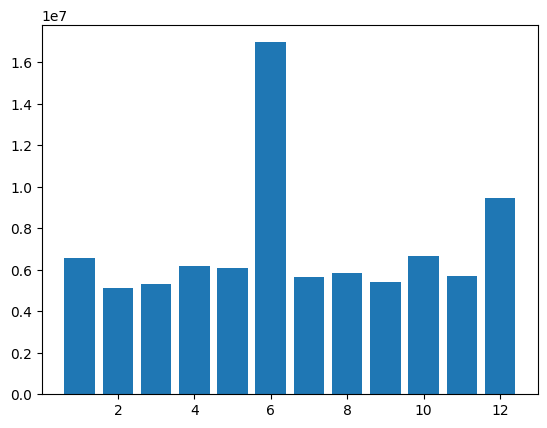

In [ ]:
plt.bar(x=hyd_month_df["month"],height=hyd_month_df.visitors)

## Population of 2019 each district

In [ ]:
url = "http://en.wikipedia.org/wiki/List_of_districts_of_Telangana"
tables = pd.read_html(url)
telangana_dis = tables[1]
telangana_dis.drop(["S. No.", "Headquarters", "Area (km2)", "No.of mandals", "Density (per km2)", "Urban (%)", "Literacy (%)", "Sex ratio", "Map"], axis=1, inplace=True)
telangana_dis["pop_growth_%"] = 12.45
telangana_dis = telangana_dis.iloc[:-1 , :]
telangana_dis["pop_growth"] = 12.45/100*telangana_dis["Population (2011 census)"]
telangana_dis["final_pop_2019"] = telangana_dis["Population (2011 census)"] + telangana_dis["pop_growth"]
telangana_dis["final_pop_2019"] = telangana_dis["final_pop_2019"].round().astype("int")
telangana_dis.rename(columns={"Name":"district"}, inplace =True)
telangana_dis["district"] = telangana_dis["district"].str.strip()
telangana_dis

<ipython-input-18-41178ffa397d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telangana_dis["pop_growth"] = 12.45/100*telangana_dis["Population (2011 census)"]
<ipython-input-18-41178ffa397d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telangana_dis["final_pop_2019"] = telangana_dis["Population (2011 census)"] + telangana_dis["pop_growth"]
<ipython-input-18-41178ffa397d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,district,Population (2011 census),pop_growth_%,pop_growth,final_pop_2019
0,Adilabad,708972,12.45,88267.0140,797239
1,Kumuram Bheem,515812,12.45,64218.5940,580031
2,Mancherial,807037,12.45,100476.1065,907513
3,Nirmal,709418,12.45,88322.5410,797741
4,Nizamabad,1571022,12.45,195592.2390,1766614
5,Jagitial,985417,12.45,122684.4165,1108101
6,Peddapalli,795332,12.45,99018.8340,894351
7,Kamareddy,972625,12.45,121091.8125,1093717
8,Rajanna Sircilla,552037,12.45,68728.6065,620766
9,Karimnagar,1005711,12.45,125211.0195,1130922


In [ ]:
tourism_19 = tourism_y.loc[tourism_y["year"]==2019]
tourism_19["district"].loc[tourism_19["district"] == "Komaram Bheem Asifabad"] = "Kumuram Bheem"
tourism_19["district"].loc[tourism_19["district"] == "Jagtial"] = "Jagitial"
tourism_19["district"].loc[tourism_19["district"] == "Jayashankar Bhoopalpally"] = "Jayashankar"
tourism_19["district"].loc[tourism_19["district"] == "Jayashankar Bhoopalpally"] = "Jayashankar"
tourism_19["district"].loc[tourism_19["district"] == "Warangal (Urban)"] = "Hanamkonda"
tourism_19["district"].loc[tourism_19["district"] == "Warangal (Rural)"] = "Warangal"
tourism_19["district"].loc[tourism_19["district"] == "Bhadradri Kothagudem"] = "Bhadradri"
tourism_19["district"].loc[tourism_19["district"] == "Yadadri Bhongir"] = "Yadadri"
tourism_19["district"].loc[tourism_19["district"] == "Medchal"] = "Medchal–Malkajgiri"
tourism_19["district"].loc[tourism_19["district"] == "Mahbubnagar"] = "Mahabubnagar"
tourism_19["district"].loc[tourism_19["district"] == "Jogulamba Gadwal"] = "Jogulamba"
tourism_19.reset_index()

<ipython-input-40-b4f1e1f512c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourism_19["district"].loc[tourism_19["district"] == "Komaram Bheem Asifabad"] = "Kumuram Bheem"
<ipython-input-40-b4f1e1f512c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourism_19["district"].loc[tourism_19["district"] == "Jagtial"] = "Jagitial"
<ipython-input-40-b4f1e1f512c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourism_19["district"]

,index,district,year,visitors
0,3,Adilabad,2019,775901
1,7,Bhadradri,2019,12817737
2,11,Hyderabad,2019,14121662
3,15,Jagitial,2019,3086115
4,19,Jangaon,2019,328890
5,23,Jayashankar,2019,662575
6,27,Jogulamba,2019,2008290
7,31,Kamareddy,2019,534
8,35,Karimnagar,2019,77491
9,39,Khammam,2019,1413440


In [ ]:
tourist_footfall_ratio_df = telangana_dis.merge(tourism_19, on = "district", how = "outer")
tourist_footfall_ratio_df["ratio"] = tourist_footfall_ratio_df['visitors'] / tourist_footfall_ratio_df["final_pop_2019"]
tourist_footfall_ratio_df = tourist_footfall_ratio_df.sort_values("ratio", ascending = False).reset_index()
tourist_footfall_ratio_df.drop(["index", "Population (2011 census)", "pop_growth_%", "pop_growth", "year"], axis = 1, inplace = True)
tourist_footfall_ratio_df

,district,final_pop_2019,visitors,ratio
0,Rajanna Sircilla,620766,16832897,27.116332
1,Bhadradri,1202384,12817737,10.660269
2,Medak,862973,5452570,6.318355
3,Mulugu,289833,1820375,6.280772
4,Yadadri,831509,4489374,5.399068
5,Nirmal,797741,3816778,4.784483
6,Hyderabad,4434267,14121662,3.184667
7,Jogulamba,685934,2008290,2.927818
8,Jagitial,1108101,3086115,2.785048
9,Sangareddy,1717818,4553160,2.650549
